In [27]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

database = sqlite3.connect("flights_database.db")

query_origins = """
SELECT DISTINCT origin FROM flights;
"""
origins_df = pd.read_sql(query_origins, database)

database.close()

airports_df = pd.read_csv("airports.csv") 

filtered_airports_df = airports_df[airports_df['faa'].isin(origins_df['origin'])]


print(filtered_airports_df)

     faa                                  name        lat        lon  alt  \
364  EWR  Newark Liberty International Airport  40.692501 -74.168701   18   
588  JFK  John F Kennedy International Airport  40.639801 -73.778900   13   
655  LGA                    La Guardia Airport  40.777199 -73.872597   21   

      tz dst             tzone  
364 -5.0   A  America/New_York  
588 -5.0   A  America/New_York  
655 -5.0   A  America/New_York  


In [ ]:
def plot_multiple_flights(faa_codes, origin):

    nyc = airports_df[airports_df['faa'] == origin][["lat", "lon"]].values[0]
    
    fig = px.scatter_geo(airports_df, lat="lat", lon="lon", hover_name="name",
                         title=f"Multiple Flight Paths from {origin}", opacity=0.5)
    
    for code in faa_codes:
        target_airport = airports_df[airports_df['faa'] == code]
        if not target_airport.empty:
            target_coords = target_airport[["lat", "lon"]].values[0]
            fig.add_scattergeo(lat=[nyc[0], target_coords[0]], lon=[nyc[1], target_coords[1]],
                               mode="lines", line=dict(width=2, color="blue"))
    
    fig.show()

def flight_finder(month: int, day: int, origin: str):
    database = sqlite3.connect("flights_database.db")
    query = """
    SELECT DISTINCT dest FROM flights
    WHERE month = ? AND day = ? AND origin = ?; 
    """
    destinations_df = pd.read_sql(query, database, params=(month, day, origin))
    database.close()
    codes = []
    for code in destinations_df['dest']:  
        codes.append(code)

    
    plot_multiple_flights(codes, origin)
    

flight_finder(6, 15, "EWR")
        

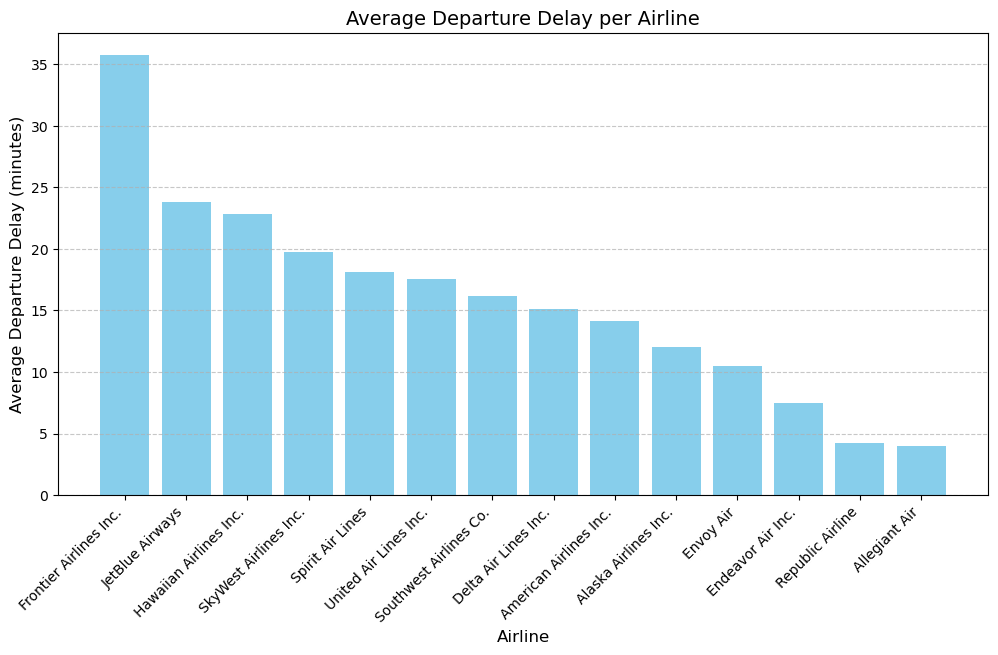

In [ ]:

database = sqlite3.connect("flights_database.db")

query = """
SELECT flights.carrier, AVG(flights.dep_delay) AS avg_departure_delay, airlines.name
FROM flights
JOIN airlines ON flights.carrier = airlines.carrier
GROUP BY flights.carrier
ORDER BY avg_departure_delay DESC;
"""

delay_df = pd.read_sql(query, database)
database.close()


plt.figure(figsize=(12, 6))
plt.bar(delay_df["name"], delay_df["avg_dep_delay"], color="skyblue")

plt.xlabel("Airline", fontsize=12)
plt.ylabel("Average Departure Delay (minutes)", fontsize=12)
plt.title("Average Departure Delay per Airline", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate airline names for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
